In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

In [2]:
path = 'C:\\Users\\79111\\Notebooks\\11. Временные ряды\\1._Лекция_tsml\\Series\\'
sales_of_company_x = pd.read_csv(path+"monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv(path+"monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv(path+"international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv(path+"mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv(path+"weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv(path+"daily-total-female-births-in-cal.csv")

In [3]:
def plot_ts(ts):
    plt.figure(figsize=(16,6))
    plt.plot(ts)
    plt.grid()

In [4]:
def test_stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
def plot_ts_and_points(ts, start_point, step):
    plt.figure(figsize=(16,6))
    plt.plot(ts)
    plt.xlim(0, len(ts)-1)
    plt.grid()
    points_count = (len(ts) - 1 - start_point) // step
    for i in range(points_count+1):
        x = start_point + i*step
        plt.plot(x, ts[x], marker='o', color='r')

## Monthly sales of company X

In [6]:
series = sales_of_company_x["Count"]

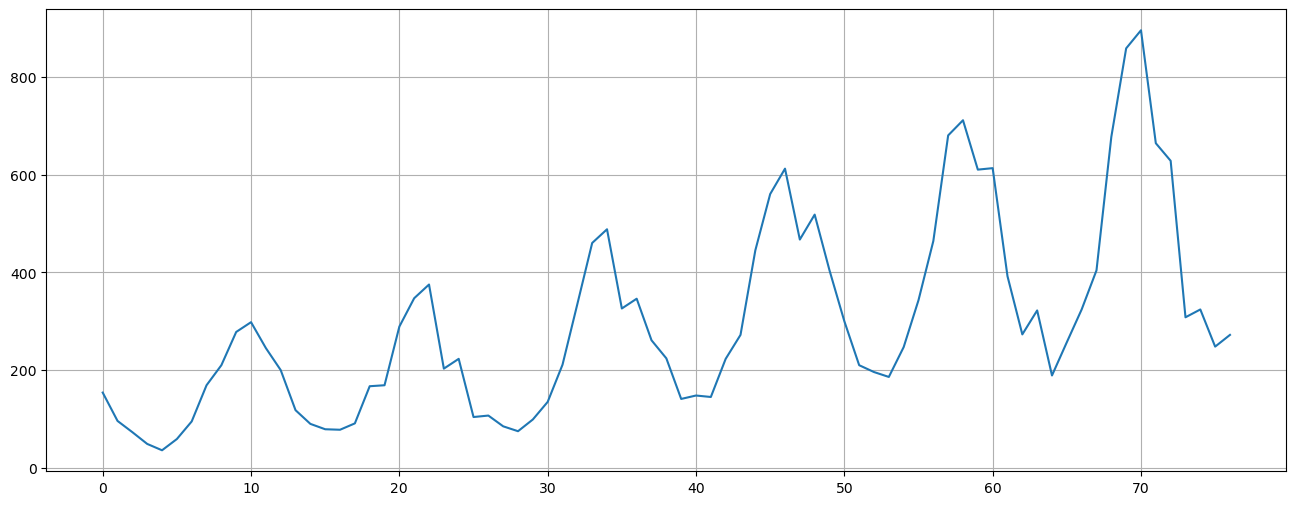

In [7]:
plot_ts(series)

In [8]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


**Согласно тесту Дики-Фуллера ряд нестационарен. Применю метод Бокса-Кокса, чтобы избавиться от гетероскедастичности**

In [9]:
series = boxcox(series, 0)

**В ряде очевидно присутствует восходящий тренд и сезонность, равная 12 периодам. Избавлюсь от них с помощью дифференцирования**

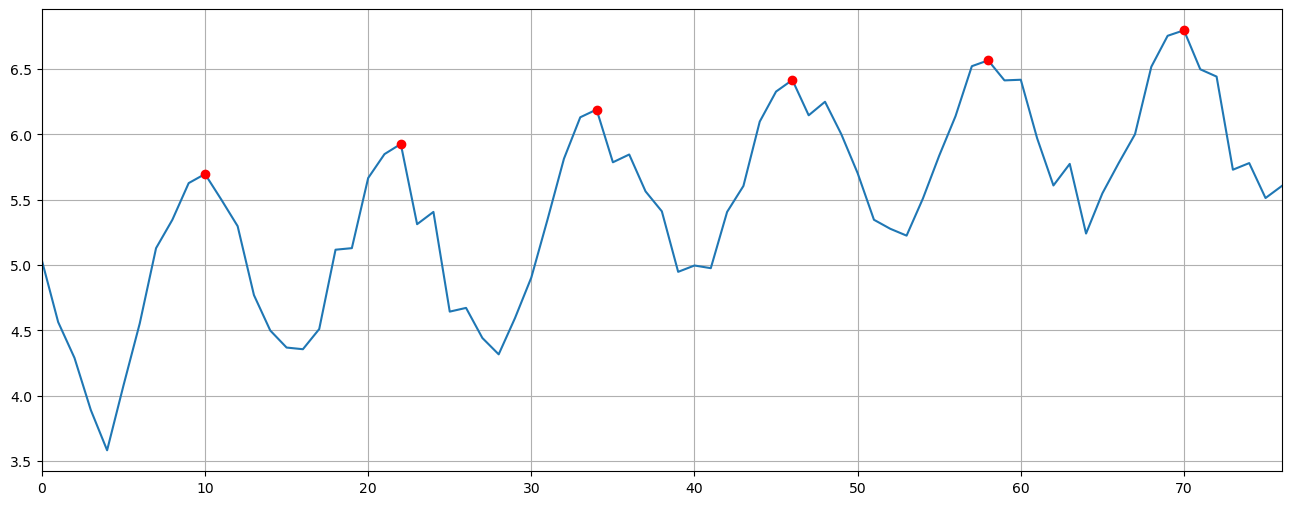

In [10]:
plot_ts_and_points(series, -2, 12)

In [11]:
series = np.diff(series, 1)
series = np.diff(series, 12)

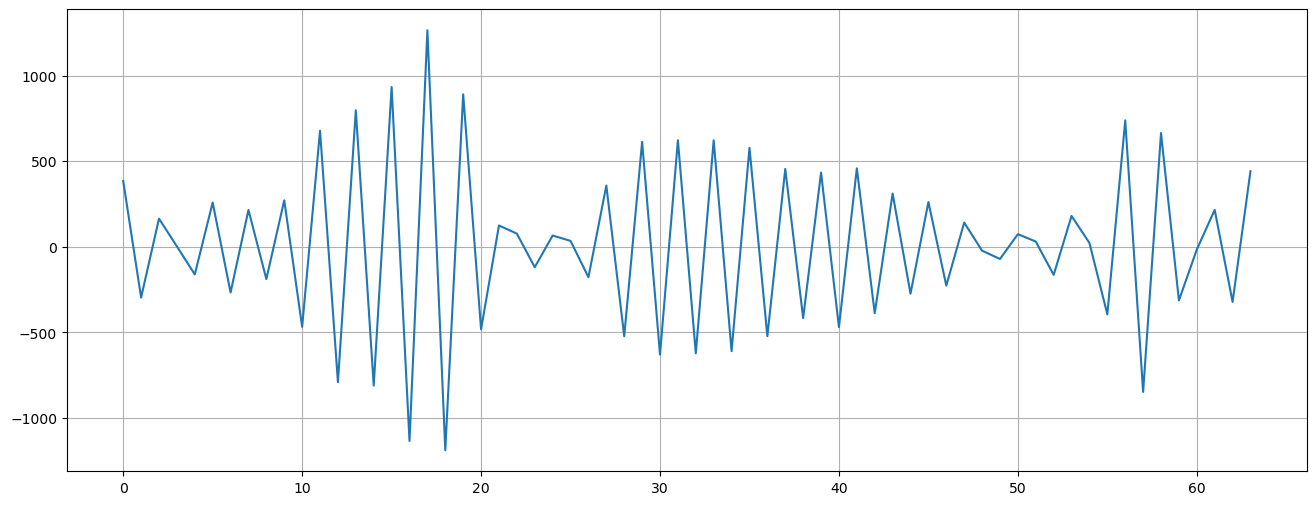

In [12]:
plot_ts(series)

In [13]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -6.850387e+00
p-value                        1.700212e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


**Получившийся ряд стационарен согласно тесту Дики-Фуллера**

## Monthly Boston armed robberies

In [14]:
series = robberies_in_boston["Count"]

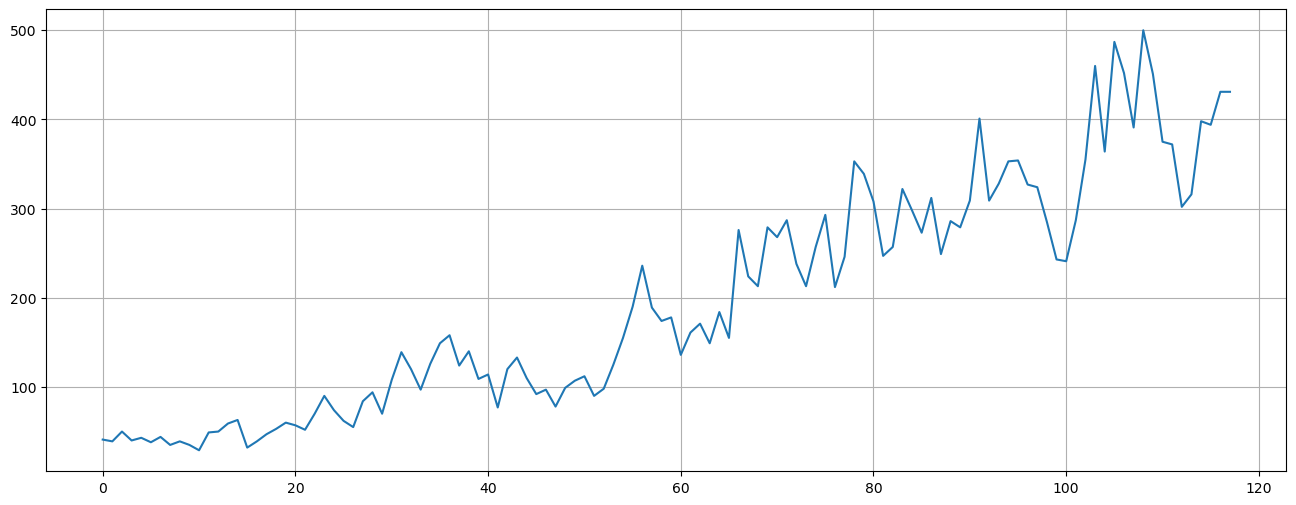

In [15]:
plot_ts(series)

In [16]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


**Согласно тесту Дики-Фуллера ряд нестационарен. Применю метод Бокса-Кокса, чтобы избавиться от гетероскедастичности**

In [17]:
series = boxcox(series, 0)

**В ряде очевидно присутствует восходящий тренд. Избавлюсь от него с помощью дифференцирования**

In [18]:
series = np.diff(series, 1)

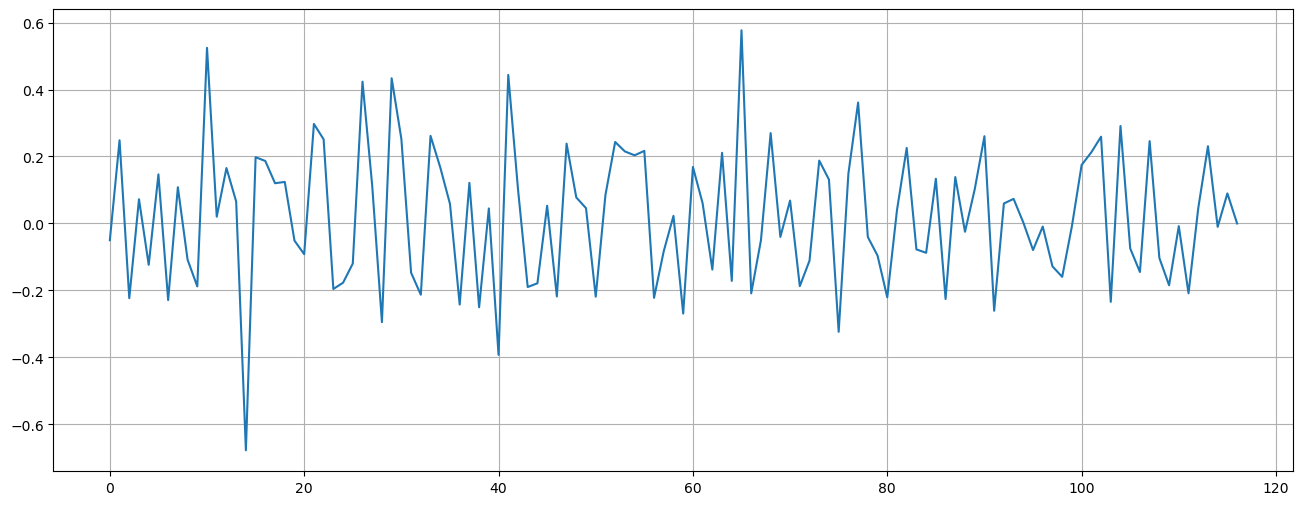

In [19]:
plot_ts(series)

In [20]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


**Получившийся ряд стационарен согласно тесту Дики-Фуллера**

## International airline passengers: monthly totals in thousands

In [21]:
series = airlines_passengers["Count"]

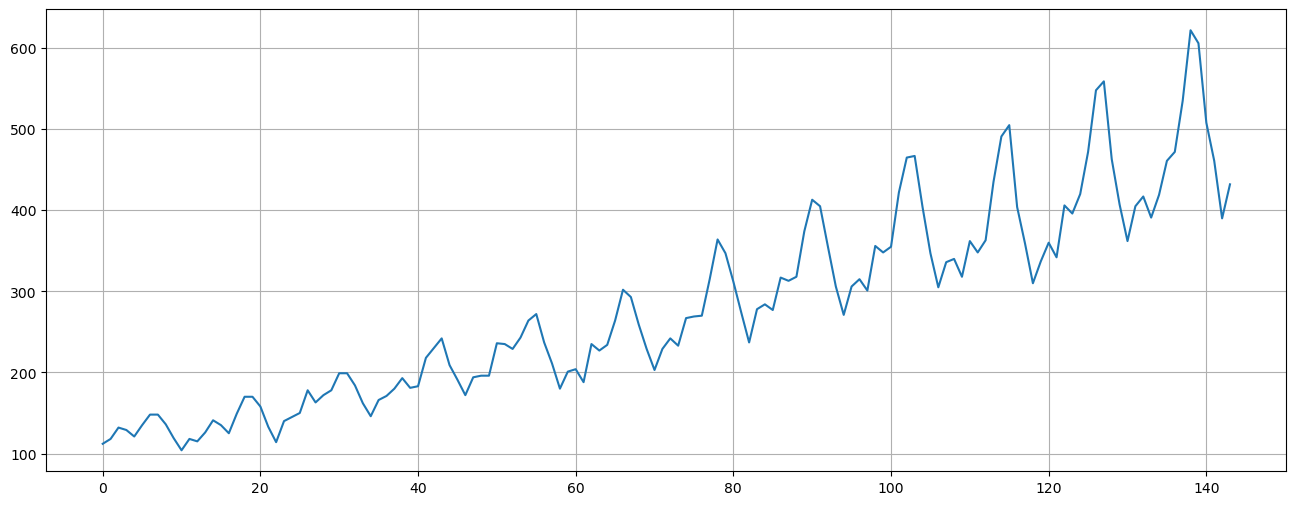

In [22]:
plot_ts(series)

In [23]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Согласно тесту Дики-Фуллера ряд нестационарен. Применю метод Бокса-Кокса, чтобы избавиться от гетероскедастичности**

In [24]:
series = boxcox(series, 0)

**В ряде очевидно присутствует восходящий тренд и сезонность, равная 12 периодам. Избавлюсь от них с помощью дифференцирования**

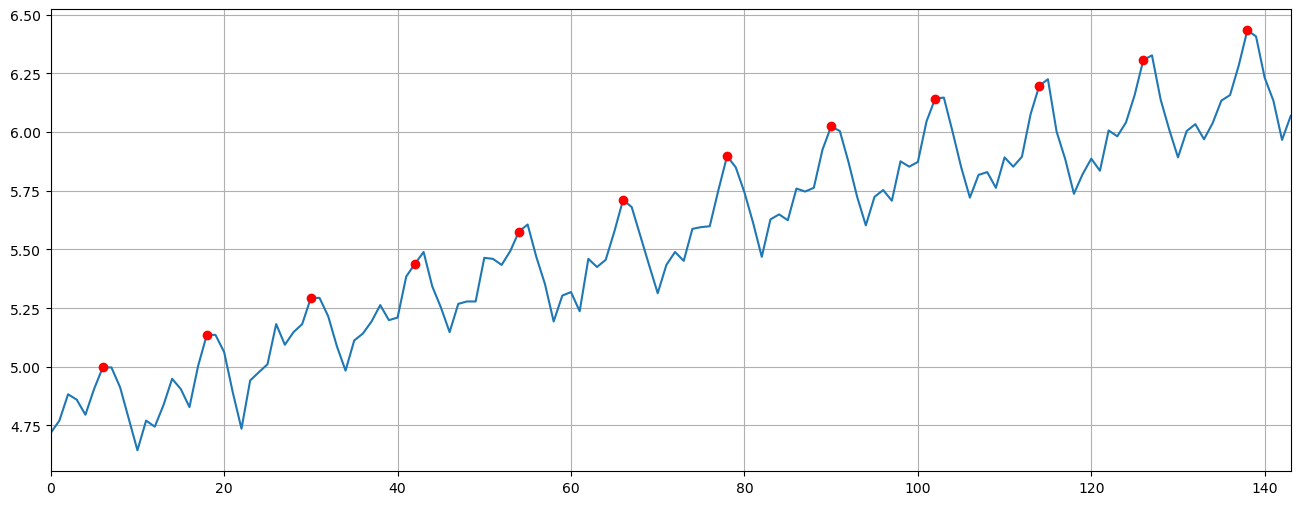

In [25]:
plot_ts_and_points(series, 6, 12)

In [26]:
series = np.diff(series, 1)
series = np.diff(series, 12)

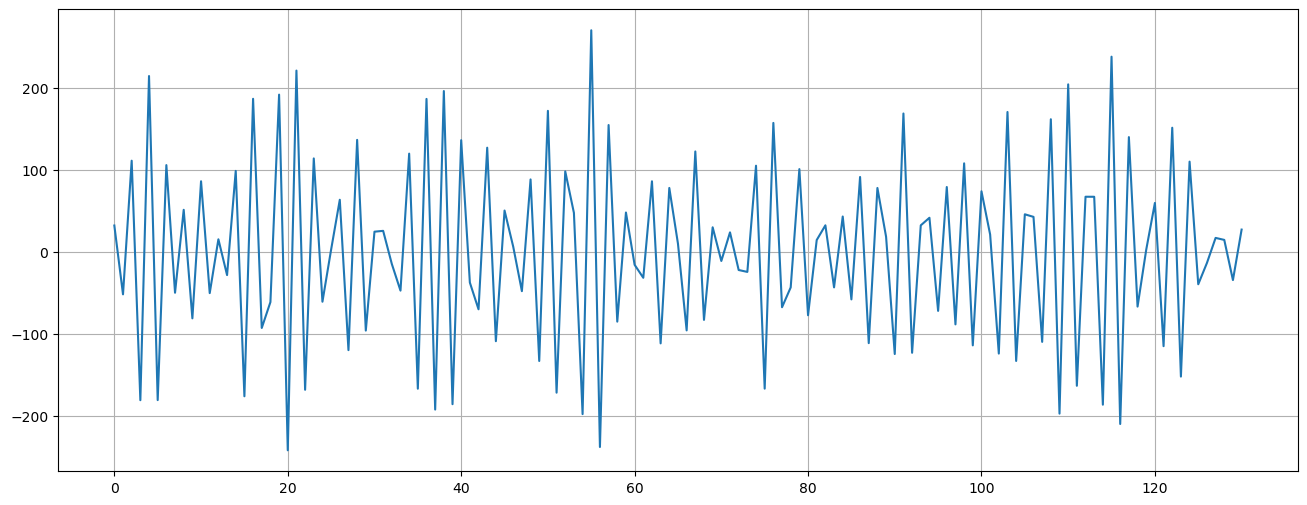

In [27]:
plot_ts(series)

In [28]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.609085e+01
p-value                        5.255378e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


**Получившийся ряд стационарен согласно тесту Дики-Фуллера**

## Mean monthly air temperature (Deg. F) Nottingham Castle

In [29]:
series = mean_monthly_temp["Deg"]

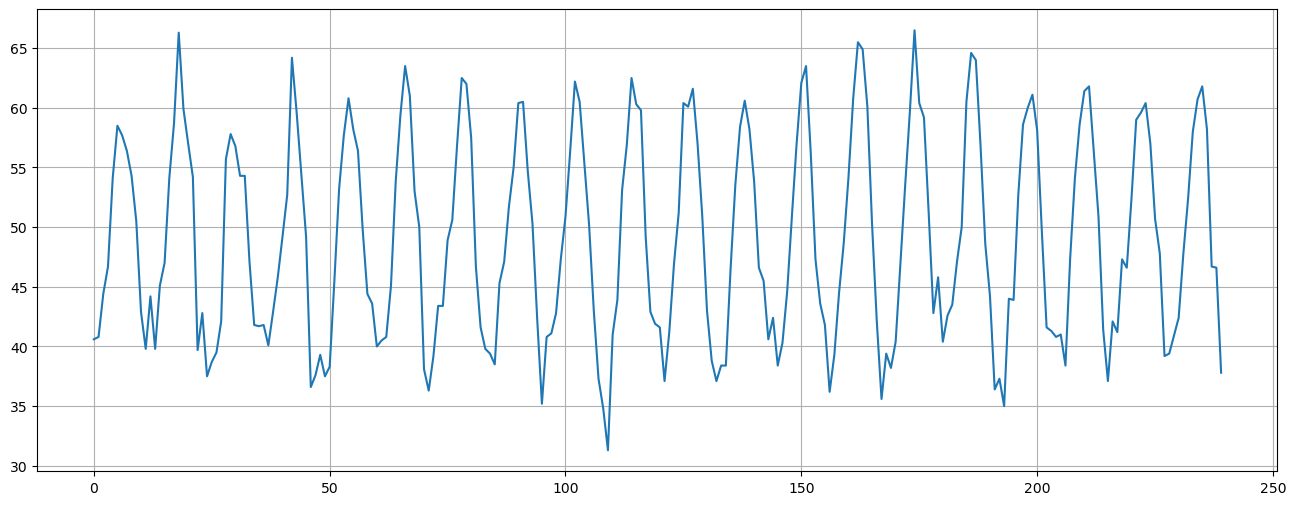

In [30]:
plot_ts(series)

In [31]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


**Согласно тесту Дики-Фуллера ряд стационарен с уровнем значимости 5%. Но визуально кажется, что присутствует сезонность, равная 12 периодам. Избавлюсь от нее с помощью дифференцирования**

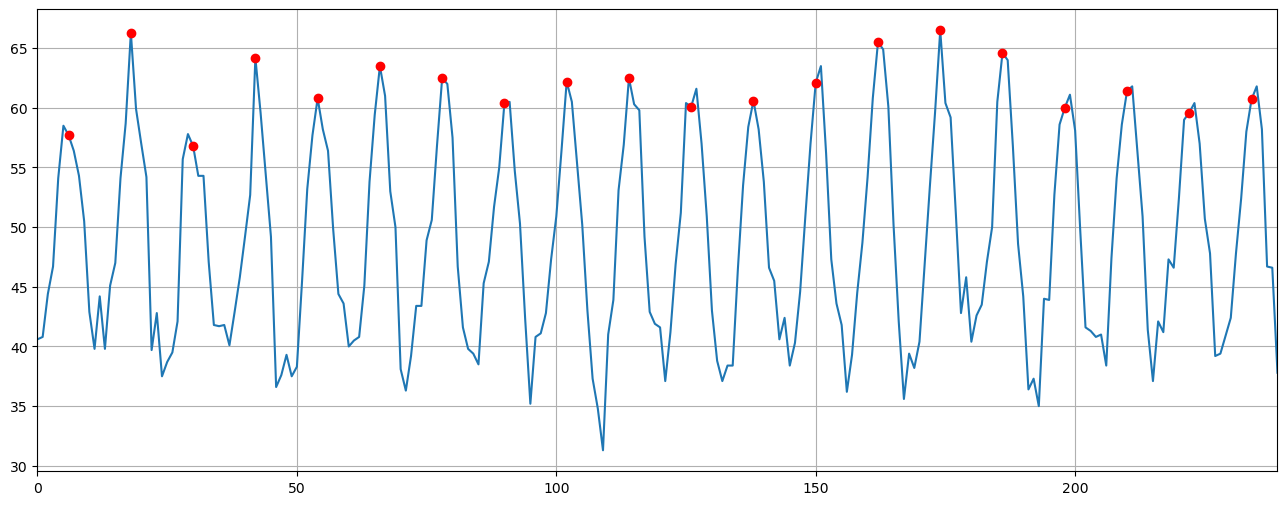

In [32]:
plot_ts_and_points(series, 6, 12)

In [33]:
series = np.diff(series, 12)

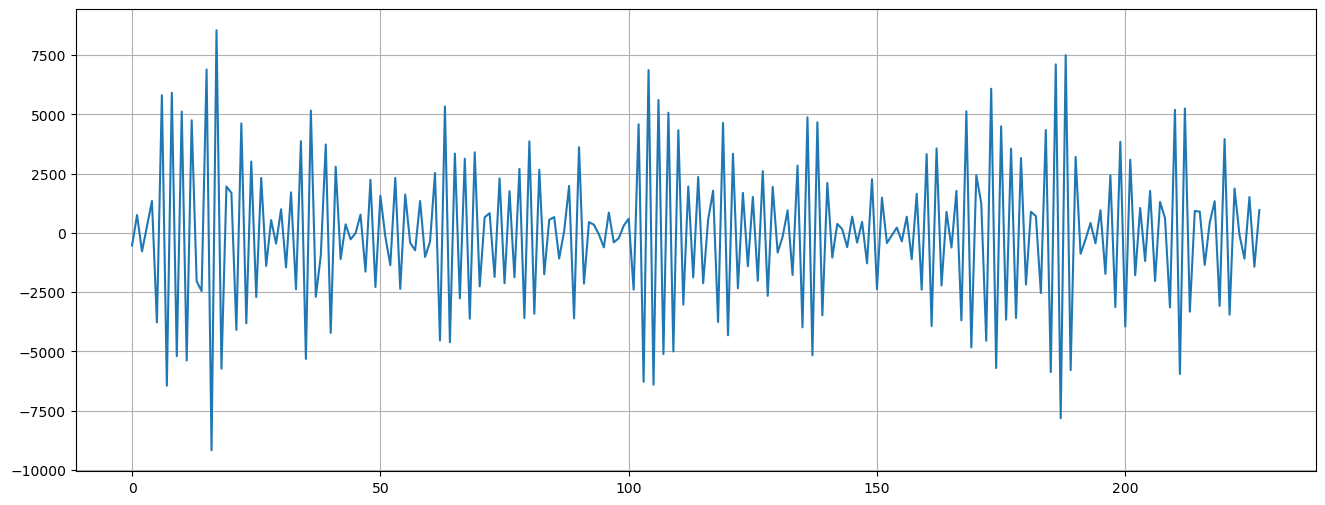

In [34]:
plot_ts(series)

In [35]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


**Получившийся ряд стационарен согласно тесту Дики-Фуллера**

## Weekly closings of the Dow-Jones industrial average

In [36]:
series = dowjones_closing["Close"]

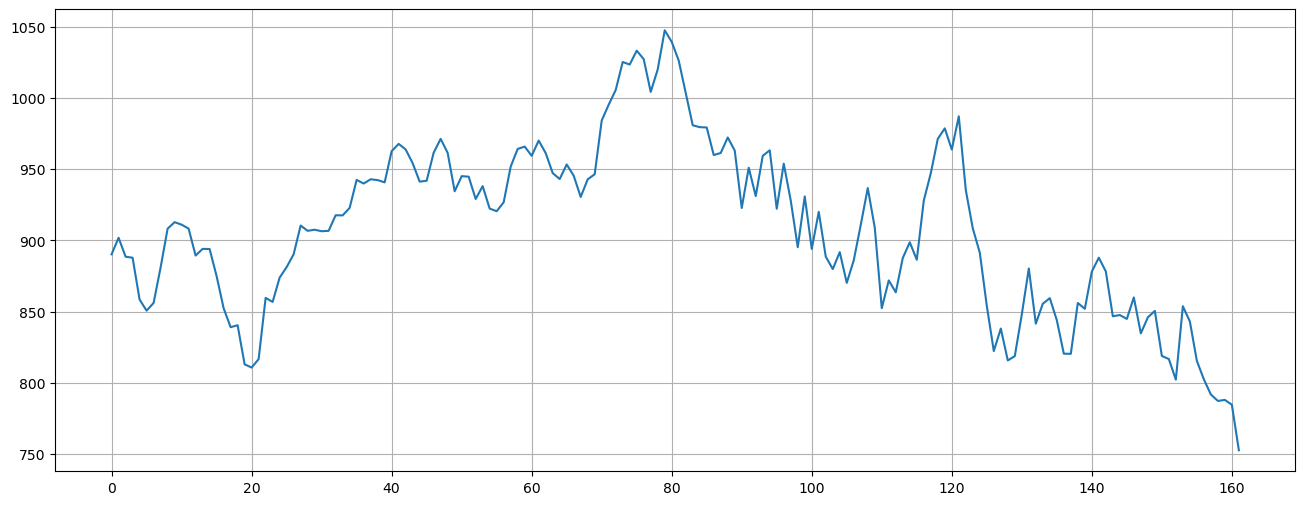

In [37]:
plot_ts(series)

In [38]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


**Согласно тесту Дики-Фуллера ряд нестационарен. В ряде похоже присутствует сначала восходящий и затем нисходящий тренд. Избавлюсь от него с помощью дифференцирования**

In [39]:
series = np.diff(series, 1)

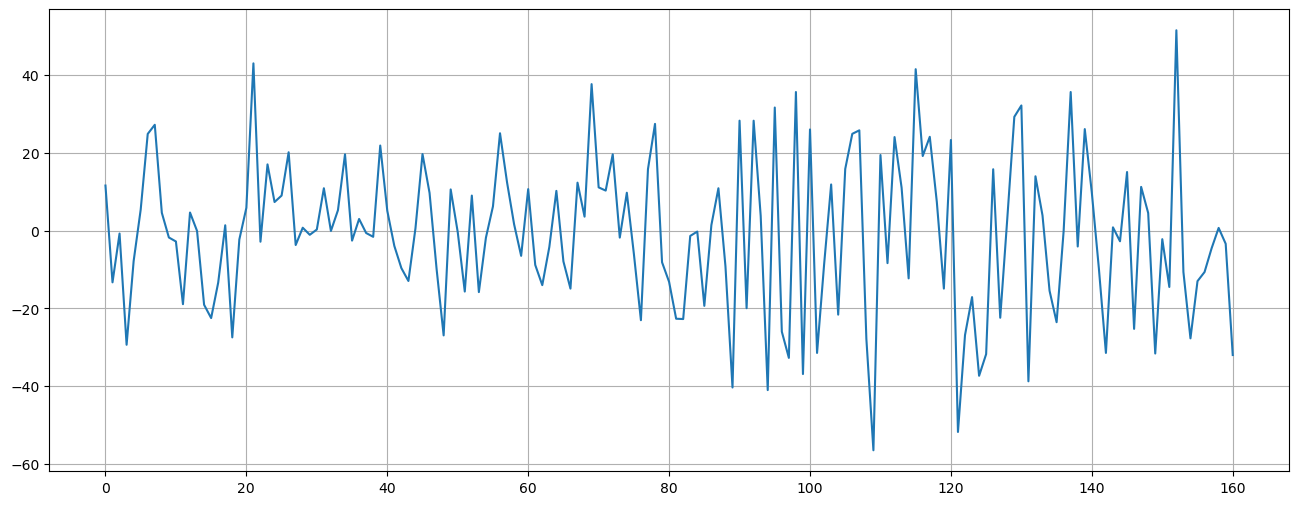

In [40]:
plot_ts(series)

In [41]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


**Получившийся ряд стационарен согласно тесту Дики-Фуллера**

## Daily total female births in California

In [42]:
series = female_births["Count"]

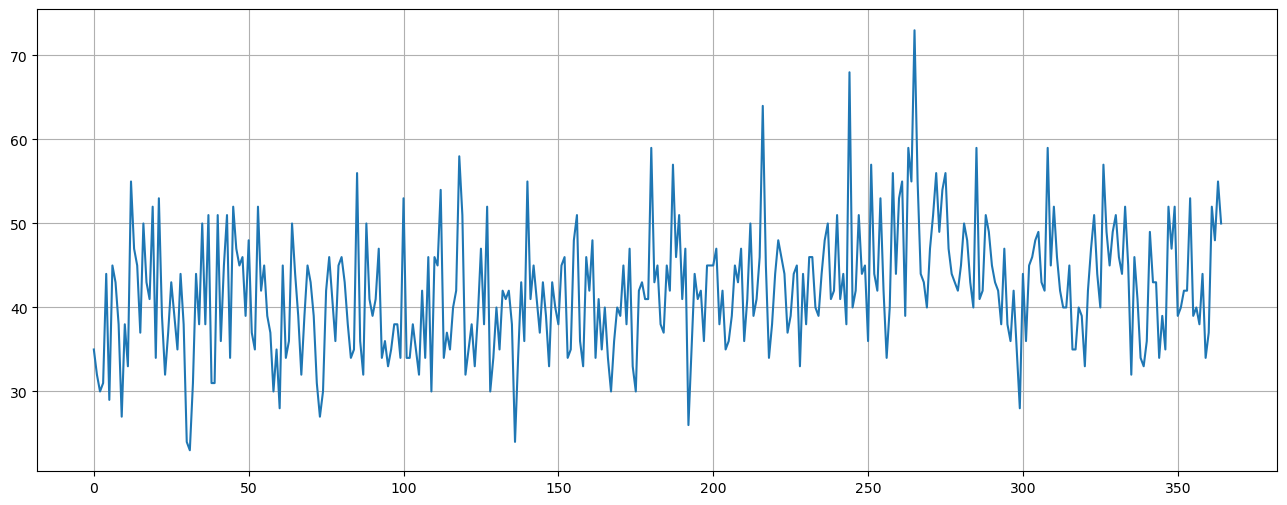

In [43]:
plot_ts(series)

In [44]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


**Согласно тесту Дики-Фуллера этот ряд уже стационарен. Визуально мне тоже так кажется. Дополнительно я лишь приведу среднее к нулю, вычтя его из каждого элемента**

In [45]:
series = series - np.mean(series)

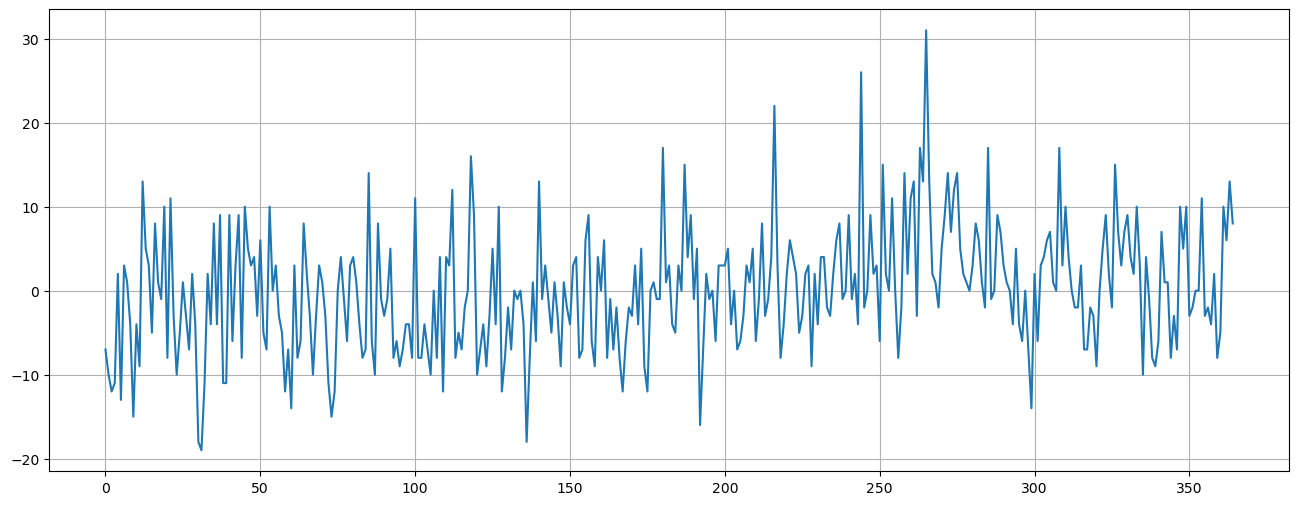

In [46]:
plot_ts(series)